In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema

def ShowImage(title, img, ctype):
    plt.figure(figsize=(4, 4))
    if ctype == 'bgr':
        b, g, r = cv2.split(img)       
        rgb_img = cv2.merge([r, g, b])     
        plt.imshow(rgb_img)
    elif ctype == 'hsv':
        rgb = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
        plt.imshow(rgb)
    elif ctype == 'gray':
        plt.imshow(img, cmap='gray')
    elif ctype == 'rgb':
        plt.imshow(img)
    else:
        raise Exception("Unknown colour type")
    plt.axis('off')
    plt.title(title)
    plt.show()

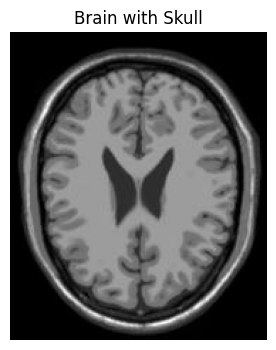

In [2]:
#Read in image
img           = cv2.imread('Extracted_files\\jpg\\t1_icbm_normal_1mm_pn0_rf0\\slice_95.jpg')
gray          = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain with Skull',gray,'gray')


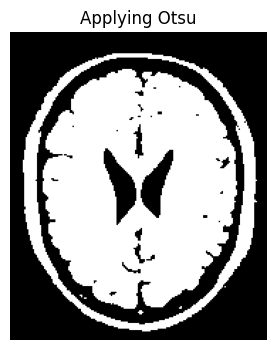

In [3]:
#Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

ShowImage('Applying Otsu',thresh,'gray')

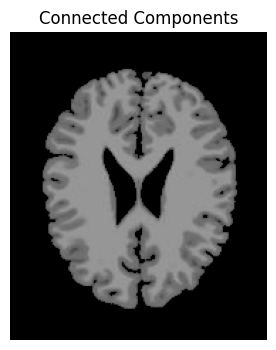

In [4]:
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
#marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if(m==1 or m==2 or m==3)] 

#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)
ShowImage('Connected Components',brain_out,'rgb')

In [23]:
def extract_brain(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg"):  
            # Read the image
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Threshold the image to binary using Otsu's method
            ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

            # Get connected components
            ret, markers = cv2.connectedComponents(thresh)

            # Get the area taken by each component. Ignore label 0 since this is the background.
            marker_area = [np.sum(markers == m) for m in range(1, np.max(markers) + 1)]
            #marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if(m==1 or m==2 or m==3) and m!=0] 


            # Get label of largest component by area
            largest_component = np.argmax(marker_area) + 1 

            # Get pixels which correspond to the brain
            brain_mask = markers == largest_component

            # Extracting the Brain
            brain_out = img.copy()
            # In a copy of the original image, clear those pixels that don't correspond to the brain
            brain_out[brain_mask == False] = (0, 0, 0)

            # Save the result
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, brain_out)

            # Show the processed image (optional)
            #ShowImage('Connected Components', brain_out, 'rgb')

In [24]:
# Example usage:
input_folder = 'Extracted_files\\jpg\\t1_icbm_normal_1mm_pn0_rf0'
output_folder = 'Skullstriped\\jpg'
extract_brain(input_folder, output_folder)
